<a href="https://colab.research.google.com/github/npace828/CreditCardFraud_IsoForest/blob/main/CreditCardFraud_IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (26).zip to archive (26) (3).zip


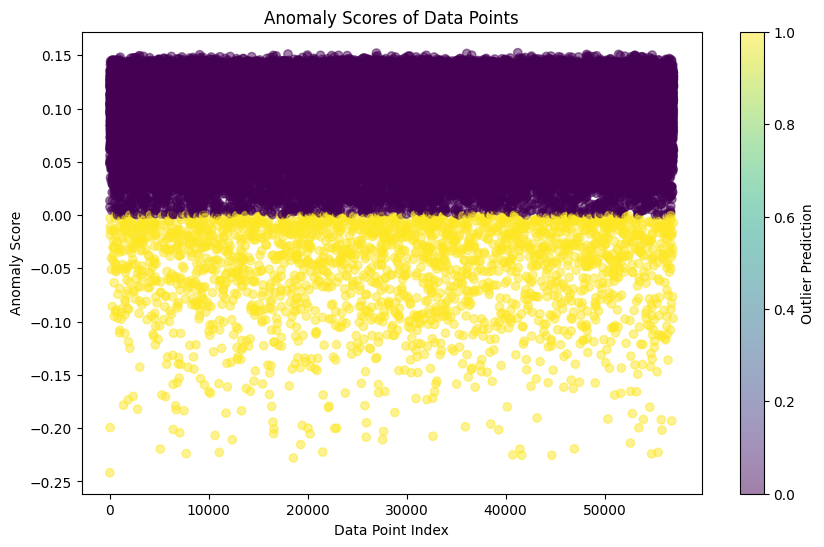

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import zipfile
import io
from google.colab import files

# Upload the zip CC Fraud file from kaggle
uploaded = files.upload()

# Assume the uploaded zip file is named 'uploaded_file.zip'
with zipfile.ZipFile(next(iter(uploaded)), 'r') as zip_ref:
    # Extract the first file in the zip file
    csv_file = zip_ref.namelist()[0]
    with zip_ref.open(csv_file) as file:
        # Read the CSV file
        data = pd.read_csv(io.BytesIO(file.read()))

# Split features and target variable
X = data.drop(columns=["Class"])
y = data["Class"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model
isolation_forest.fit(X_train)

# Predict outliers/anomalies
outliers = isolation_forest.predict(X_test)
outliers = np.where(outliers == -1, 1, 0)  # Convert -1 (outlier) to 1, and 1 (inlier) to 0

# Calculate anomaly scores
anomaly_scores = isolation_forest.decision_function(X_test)

# Plot anomaly scores
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=outliers, cmap='viridis', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores of Data Points')
plt.colorbar(label='Outlier Prediction')
plt.show()





